In [ ]:
""" 
Analysis of copy strategies 6,7,8, to see whether evidence of copying
- also to see which strategy best.
- also generally to setup blocks based analysis.

"""

In [1]:
%load_ext autoreload
%autoreload 2

%cd ..
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *


/data1/code/python/drawmonkey
NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [21]:
animal = "Pancho";
date = 200709
expt = "pilot"
session = 3

from tools.preprocess import *
fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

found one matching filename: ['/data2/animals/Pancho/200709/200709_151636_pilot_Pancho_3.h5']
found one matching filename: ['/data2/animals/Pancho/200709/200709_151636_pilot_Pancho_3.pkl']
-- loaded presaved data: /data2/animals/Pancho/200709/200709_151636_pilot_Pancho_3.pkl


In [ ]:
# ==== 7/7/2020: Have to hand-code the block categories

In [ ]:
# ==== 7/7/2020: Have to hand-code the block categories
import seaborn as sns

# -- 
# --- enter it manually.
N = 43
block_categories = {
    "s6":list(range(1,N,6)),
    "s6probe":list(range(2,N,6)),
    "s7":list(range(3,N,6)),
    "s7probe":list(range(4,N,6)),
    "s8":list(range(5,N,6)),
    "s8probe":list(range(6,N,6))}

def getTrialsBlockCategory(fd, trial):
    b = getTrialsBlock(fd, trial)
    for k, v in block_categories.items():
        if b in v:
            return k
        
def extractSessionDf(filedata):
    """get pandas dataframe, each trial in flat structure.
    this is general purpose, can build on this later."""
    import pandas as pd

    trials = getIndsTrials(filedata)

    fd_dict = {
        # "block":[int(f[0]) for f in filedata["TrialRecord"]["BlockCount"]],
        "block":[int(f[0]) for f in filedata["TrialRecord"]["BlocksPlayed"]],
        "trial":np.arange(1, filedata["params"]["n_trials"]+1),
        "errorcodes":[int(getTrialsOutcomesAll(filedata, t)["errorcode"][0]) for t in trials],
        "fracinkgotten":[getTrialsOutcomesAll(filedata, t)["fracinkgotten"] for t in trials],
        "errorstring":[getTrialsOutcomesAll(filedata, t)["trialoutcomes"]["failure_mode"] for t in trials],
        "taskstage":[getTrialsTask(filedata, t)["stage"] for t in trials], 
        "blockcategory":[getTrialsBlockCategory(fd, t) for t in getIndsTrials(fd)]
    }

    # --- behavioral score
    X =[]
    for t in trials:
        BE = getTrialsBehEvaluation(filedata, t)
        if BE is None:
            X.append(np.nan)
        else:
            X.append(BE["beh_multiplier"][0][0])
    fd_dict["behscore"] = X

    
    # --- convert to dataframe
    df = pd.DataFrame(fd_dict)
    
    return df


############ START HERE

# === get dataframe, including block categories
df = extractSessionDf(fd)
yplot = "hausdorff"
sns.catplot(x = "blockcategory", y = yplot, data = df, kind = "boxen")
sns.catplot(x = "blockcategory", y = yplot, data = df)
sns.catplot(x = "blockcategory", y = yplot, data = df, kind="point")
sns.catplot(x = "blockcategory", y = yplot, data = df, kind="point")

In [ ]:
######### POST 7/7/20

In [16]:

############ START HERE
import seaborn as sns

# === get dataframe, including block categories
df = extractSessionDf(fd)
yplot = "hausdorff"
# yplot = "behscore"


got 1141 total trials


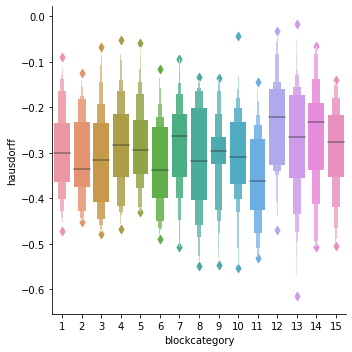

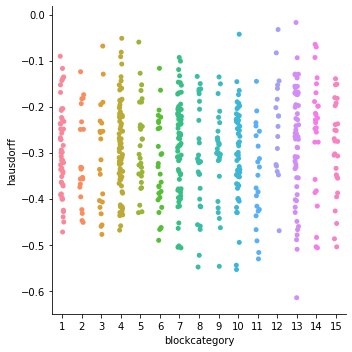

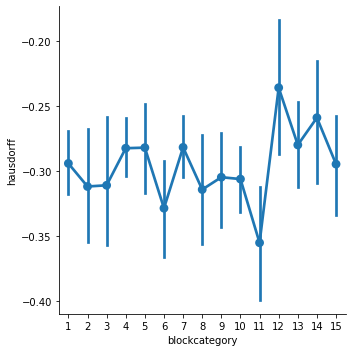

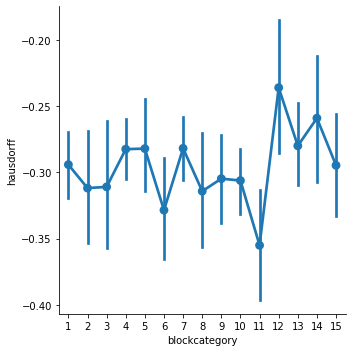

In [17]:
sns.catplot(x = "blockcategory", y = yplot, data = df, kind = "boxen")
sns.catplot(x = "blockcategory", y = yplot, data = df)
sns.catplot(x = "blockcategory", y = yplot, data = df, kind="point")
sns.catplot(x = "blockcategory", y = yplot, data = df, kind="point")

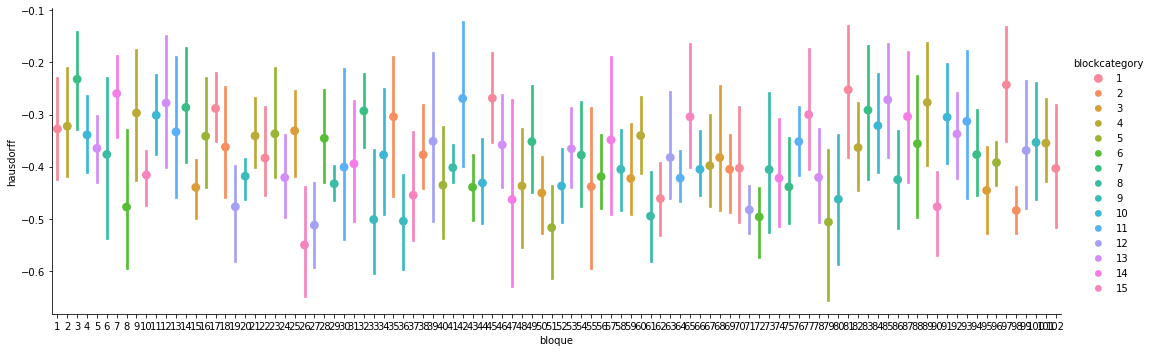

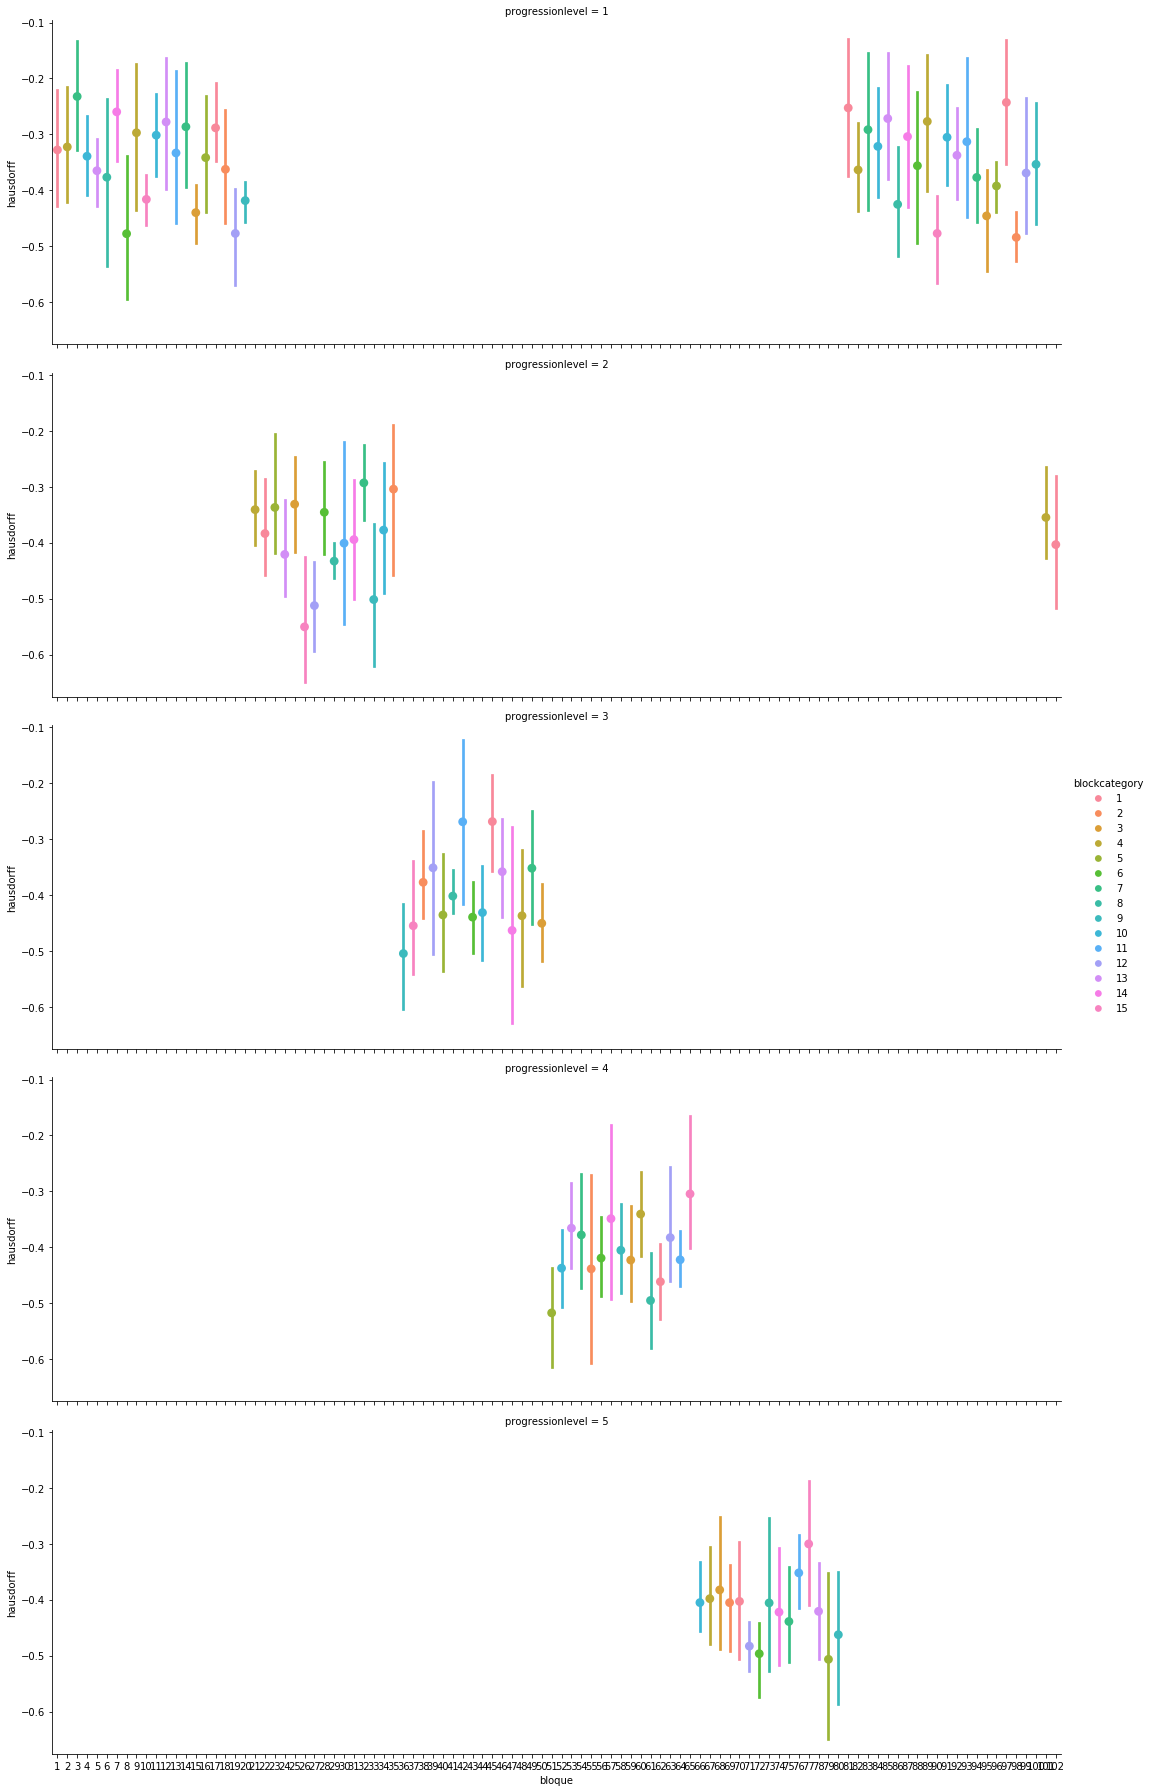

In [6]:
# ==== [GOOD] plot as a function of increasing blocks
sns.catplot(x = "bloque", y = yplot, hue = "blockcategory", data = df, kind="point", aspect=3)
sns.catplot(x = "bloque", y = yplot, hue = "blockcategory", data = df, kind="point", aspect=3, row="progressionlevel")

got 30 total trials


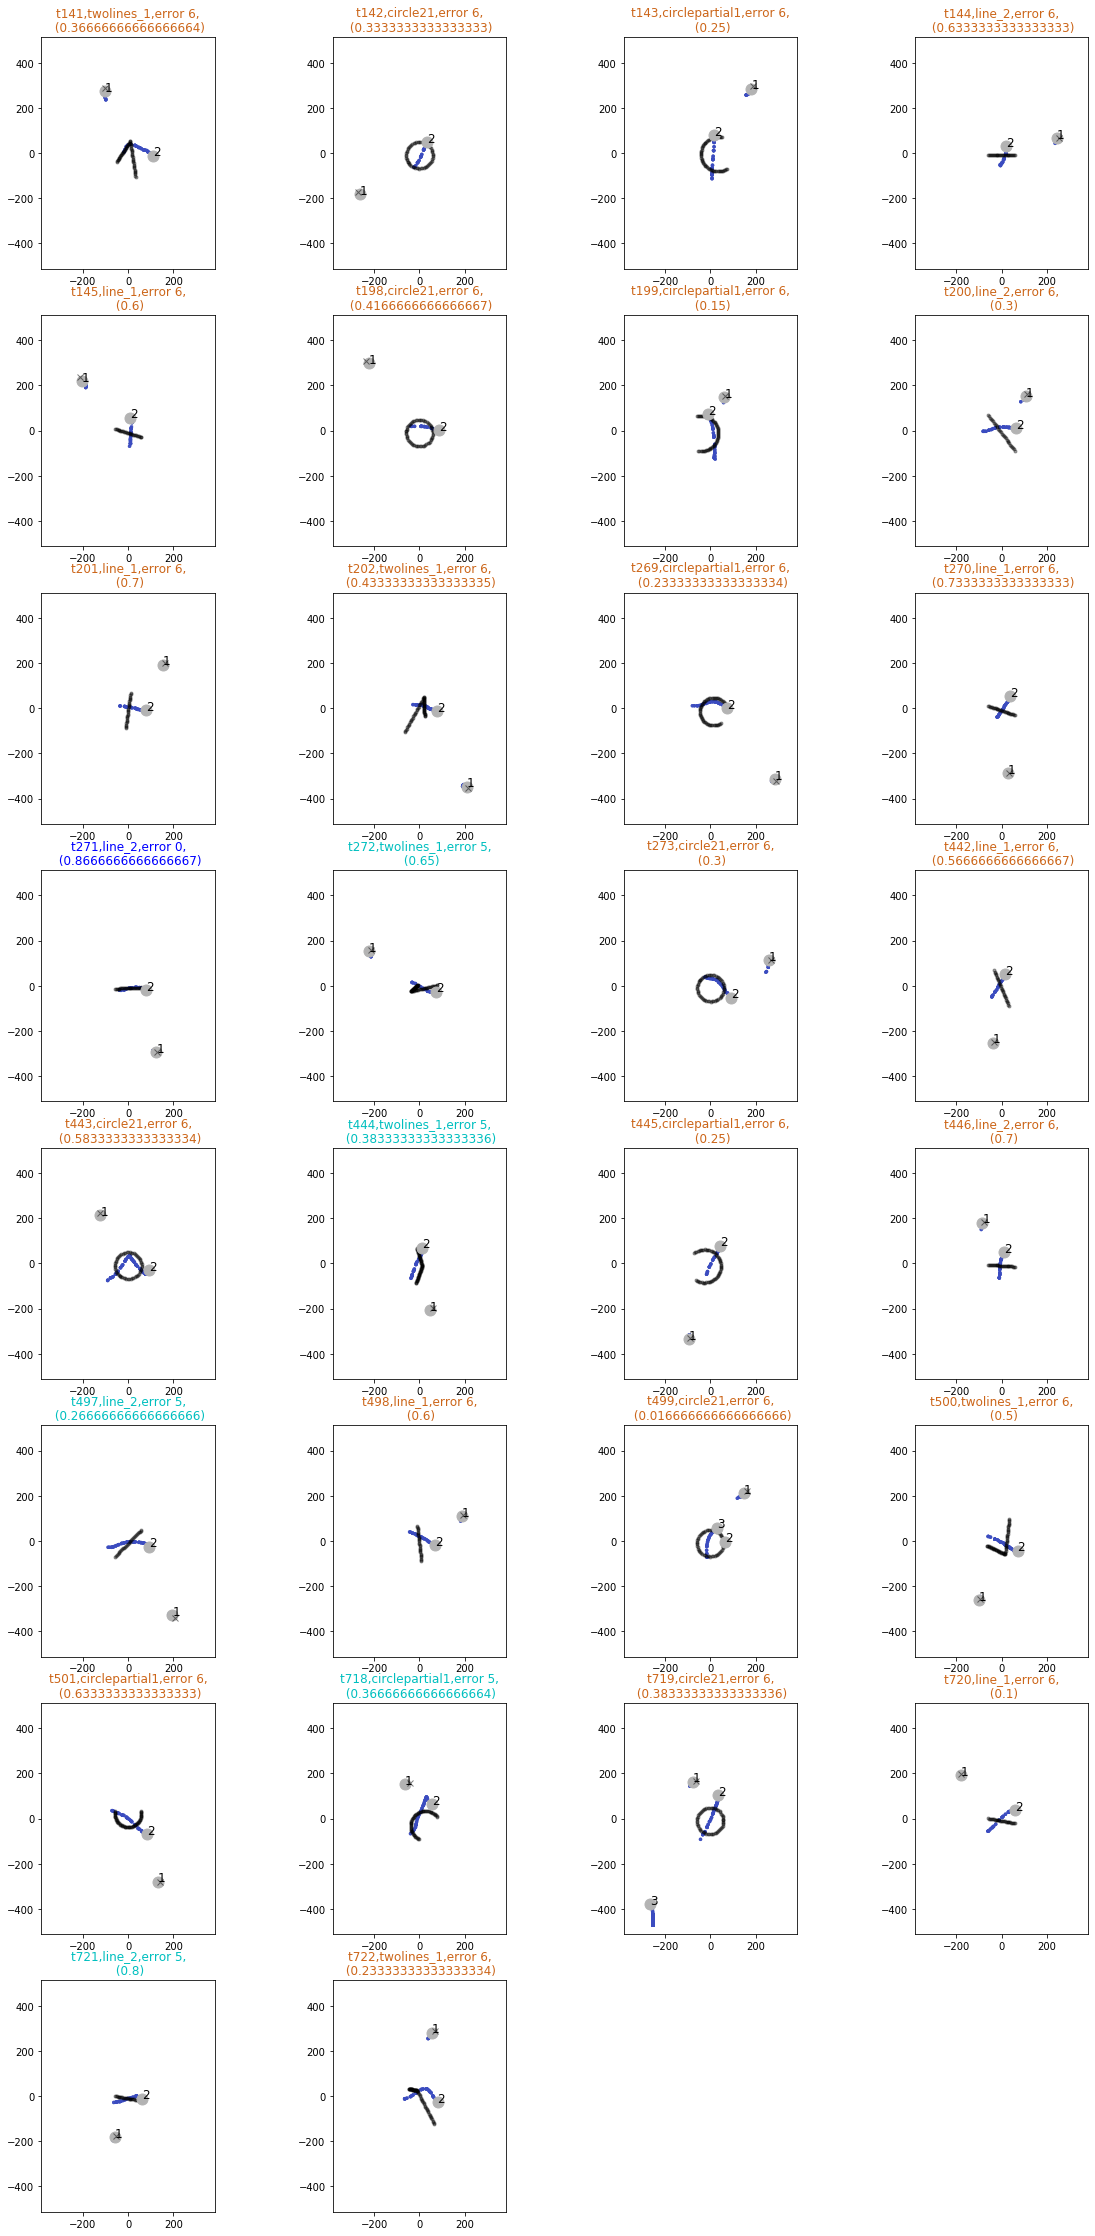

In [11]:
####  VISUALIZE, OVERLAID ON SAME PLOT

# 1) Load into stroke dict
# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them
targ = {
    "blockcategory":[12],
#     "task_stage":["line"],
}

trials_list_all = getIndsTrials(fd, targ, keep_only_if_go=True, keep_only_if_clean_strokes=True)

##################### 1) Plot raw, each trial
%matplotlib inline
plotMultTrialsSimple(fd, trials_list_all, zoom=False)

In [ ]:
%matplotlib notebook
##################### 2) Overlay all
filedata= fd
faketimesteps_ver = "from_orig"
ALIGN_BY = "ownmidpt"
ROTATE_BY = "task_first_stroke"
SCALE_BY = "task_first_stroke"
subsample_trials = None

if subsample_trials is not None:
    trials_list = random.sample(trials_list_all, subsample_trials)
    print(trials_list)
else:
    trials_list = trials_list_all


# 1) Preprocess data
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task",
                                   ver=faketimesteps_ver, replace_key_to_do=True)
stroke_dict = processAngles(stroke_dict)

# fig, axes = plt.subplots(3,2, figsize=(3*5, 2*5))
# fig.subplots_adjust(hspace=0.08, wspace=-0.35)

# # == 1) Plot in original space, trials + first touch point
# ax = axes[0][0]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], ax=ax)

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title="", strokes_to_plot="first", 
#                      plotver="raw", ax=ax)

# # == 1) Plot in original space, trials + first touch point
# ax = axes[0][1]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], ax=ax)

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title="", strokes_to_plot="first_touch", 
#                      plotver="onecolor", ax=ax)

if len(trials_list)<10:
    alpha_task = 0.4
    alpha_beh = 0.3
else:
    alpha_task = 0.05
    alpha_beh = 0.1

# # == 2) Plot touch, aligned to origin 
# ax = axes[1][0]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
#                           rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
# plt.plot(0,0, 'kx')

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title=f"align by {faketimesteps_ver}", strokes_to_plot="first_touch", 
#                      plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
#                      rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
# plt.plot(0,0, 'kx')

# == 2) Plot strokes, aligned to origin 
# ax = axes[1][1]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
#                           rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
# plt.plot(0,0, 'kx')

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title=f"align by {faketimesteps_ver}", strokes_to_plot="first", 
#                      plotver="raw", align_by=ALIGN_BY, scale_by=SCALE_BY,
#                      rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
# plt.plot(0,0, 'kx')

# == 2) Plot strokes, aligned to own midpoint
plt.figure()
ax = plt.subplot(111)
plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                      title="", strokes_to_plot="first", 
                     plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
                          rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                      title=f"align by {faketimesteps_ver}", strokes_to_plot="all", 
                     plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                     rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
plt.plot(0,0, 'xk')

In [ ]:
### CORRELATION BETWEEN ANGLE OF SAMP AND BEHAVIOR


In [31]:
fd["TrialRecord"]["User"]["TrialData"]["2"]["allPeanutPos"][2]

array([1625.1976, 1638.3729, 1671.255 , 1688.5479, 1708.6234, 1738.8247,
       1754.3591, 1773.5415, 1803.6178, 1821.6911, 1837.4565, 1871.8136,
       1887.9703, 1904.3496, 1936.095 , 1954.8548, 1972.0862])